In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sqf_df = pd.read_csv("../data/sqf-2018.csv")

In [9]:
sqf_df.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/18,19:04:00,2018,January,Monday,Based on C/W on Scene,APP,POM,1,...,G,(null),VARICK STREET && FRANKLIN STREET,(null),VARICK STREET,982327,201274,(null),PBMS,MANHATTAN
1,2,1/1/18,23:00:00,2018,January,Monday,Based on Radio Run,APP,POM,34,...,C,(null),DYCKMAN STREET && POST AVENUE,(null),DYCKMAN STREET,1004892,253548,(null),PBMN,MANHATTAN
2,3,1/1/18,23:55:00,2018,January,Monday,Based on Radio Run,APP,POM,808,...,B,4M,2245 RANDALL AVENUE,(null),RANDALL AVENUE,1026706,237776,(null),PBBX,BRONX
3,4,1/1/18,3:23:00,2018,January,Monday,Based on Radio Run,APP,POM,63,...,B,(null),EAST 38 STREET && AVENUE L,(null),EAST 38 STREET,1001347,166195,(null),PBBS,BROOKLYN
4,5,1/1/18,3:23:00,2018,January,Monday,Based on Radio Run,APP,POM,63,...,B,(null),EAST 38 STREET && AVENUE L,(null),EAST 38 STREET,1001347,166195,(null),PBBS,BROOKLYN


In [10]:
sqf_df.dtypes

STOP_FRISK_ID                                                    int64
STOP_FRISK_DATE                                                 object
Stop Frisk Time                                                 object
YEAR2                                                            int64
MONTH2                                                          object
DAY2                                                            object
STOP_WAS_INITIATED                                              object
RECORD_STATUS_CODE                                              object
ISSUING_OFFICER_RANK                                            object
ISSUING_OFFICER_COMMAND_CODE                                     int64
SUPERVISING_OFFICER_RANK                                        object
SUPERVISING_OFFICER_COMMAND_CODE                                 int64
SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED    object
LOCATION_IN_OUT_CODE                                            object
JURISD

In [15]:
sqf_df.shape

(11008, 83)

In [16]:
sqf_df['MONTH2'].value_counts()

March        1057
May          1039
August        979
September     937
July          928
January       923
April         912
June          912
October       880
February      860
November      803
December      778
Name: MONTH2, dtype: int64

In [32]:
temp = sqf_df['MONTH2'].value_counts()

In [33]:
type(temp)

pandas.core.series.Series

In [37]:
temp.index

Index(['March', 'May', 'August', 'September', 'July', 'January', 'April',
       'June', 'October', 'February', 'November', 'December'],
      dtype='object')

In [36]:
temp.values

array([1057, 1039,  979,  937,  928,  923,  912,  912,  880,  860,  803,
        778])

In [41]:
sqf_df.columns

Index(['STOP_FRISK_ID', 'STOP_FRISK_DATE', 'Stop Frisk Time', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'RECORD_STATUS_CODE',
       'ISSUING_OFFICER_RANK', 'ISSUING_OFFICER_COMMAND_CODE',
       'SUPERVISING_OFFICER_RANK', 'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_OFFENSE',
       'SUMMONS_ISSUED_FLAG', 'SUMMONS_OFFENSE_DESCRIPTION',
       'OFFICER_IN_UNIFORM_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'SHIELD_IDENTIFIES_OFFICER_FLAG', 'VERBAL_IDENTIFIES_OFFICER_FLAG',
       'FRISKED_FLAG', 'SEARCHED_FLAG', 'OTHER_CONTRABAND_FLAG',
       'FIREARM_FLAG', 'KNIFE_CUTTER_FL

## Exploratory Data Analysis

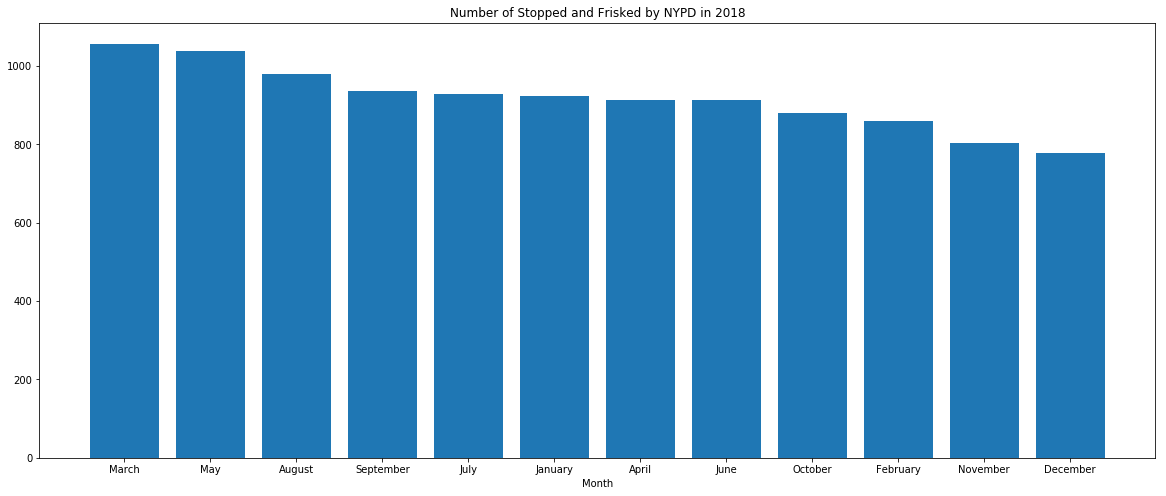

In [43]:
temp = sqf_df['MONTH2'].value_counts()
fig, ax = plt.subplots(1,1, figsize = (20, 8))
ax.bar(temp.index, temp.values)
ax.set_title("Number of Stop and Frisk incidents by NYPD in 2018")
ax.set_xlabel("Month");

From the above image, we can see that the number of incidents are not perfectly uniformly distributed across months. 

## Race

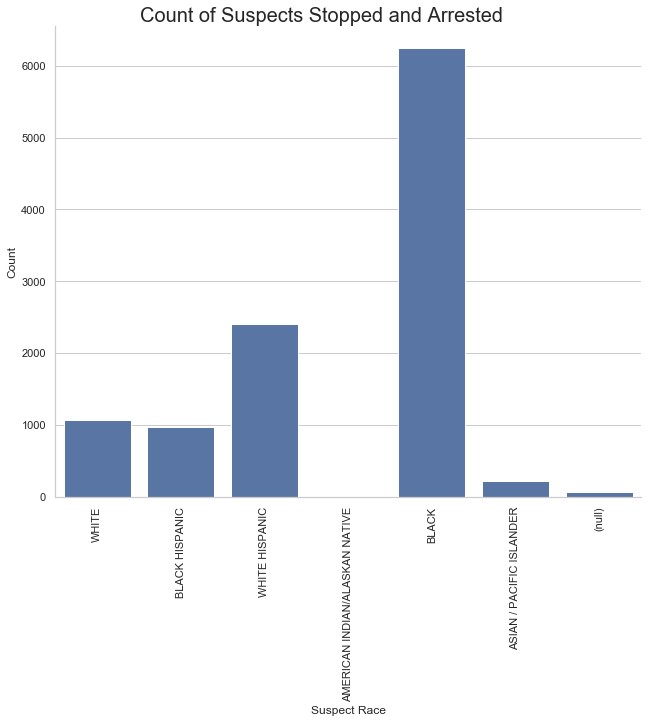

In [138]:
sqf_df['count'] = 1 # for color purpose later
sns.set(style="whitegrid")
ax = sns.catplot(x="SUSPECT_RACE_DESCRIPTION", kind="count", data=sqf_df, hue="count", legend=False) # use hue='count' for one color
ax.fig.set_size_inches(10,8)
ax.set_axis_labels("Suspect Race", "Count")
ax.fig.suptitle("Count of Suspects Stopped and Arrested", fontsize = 20)
ax.set_xticklabels(rotation = 90);

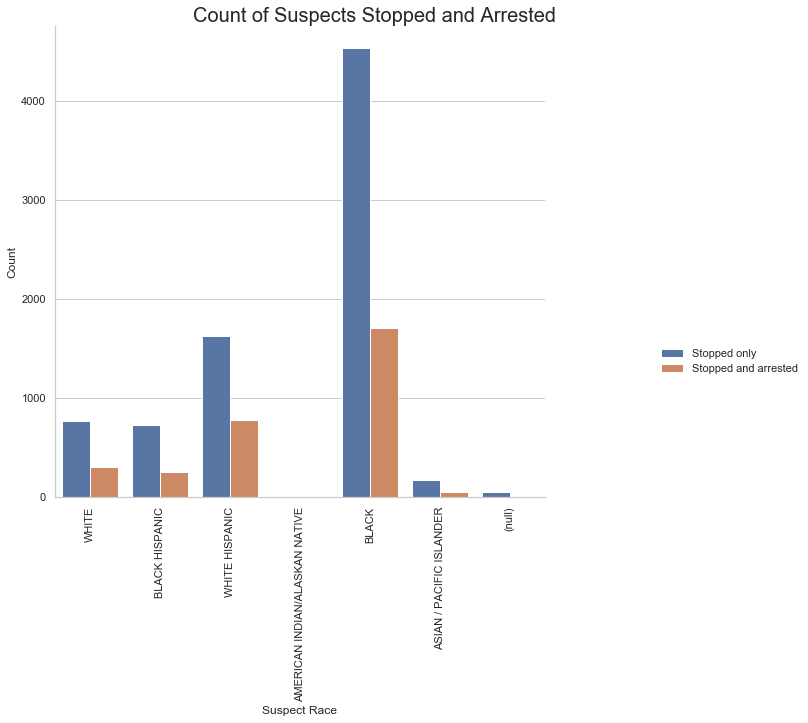

In [104]:
# temp = sqf_df['SUSPECT_RACE_DESCRIPTION'].value_counts()
sns.set(style="whitegrid")
ax = sns.catplot(x="SUSPECT_RACE_DESCRIPTION", hue="SUSPECT_ARRESTED_FLAG", kind="count", data=sqf_df)
ax.fig.set_size_inches(12,8)
ax.set_axis_labels("Suspect Race", "Count")
ax.fig.suptitle("Count of Suspects Stopped and Arrested", fontsize = 20)

# title
ax._legend.set_title("")

# legend
new_labels = ['Stopped only', 'Stopped and arrested']
for t, l in zip(ax._legend.texts, new_labels): 
    t.set_text(l)
ax.set_xticklabels(rotation = 90);

## Gender

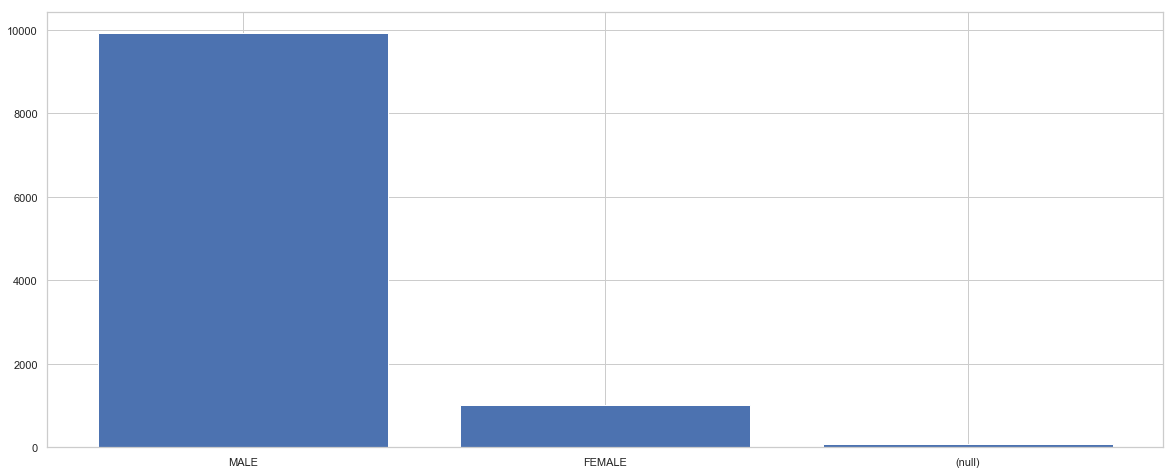

In [140]:
temp = sqf_df['SUSPECT_SEX'].value_counts()
fig, ax = plt.subplots(1,1, figsize = (20, 8))
ax.bar(temp.index, temp.values);
# ax.set_title("Number of Stop and Frisk incidents by NYPD in 2018")
# ax.set_xlabel("Month");

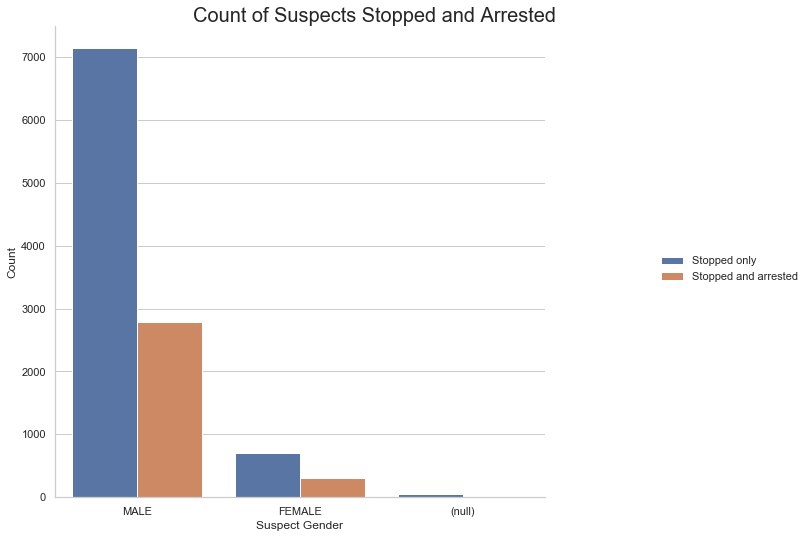

In [141]:
# temp = sqf_df['SUSPECT_RACE_DESCRIPTION'].value_counts()
sns.set(style="whitegrid")
ax = sns.catplot(x="SUSPECT_SEX", hue="SUSPECT_ARRESTED_FLAG", kind="count", data=sqf_df)
ax.fig.set_size_inches(12,8)
ax.set_axis_labels("Suspect Gender", "Count")
ax.fig.suptitle("Count of Suspects Stopped and Arrested", fontsize = 20)

# title
ax._legend.set_title("")

# legend
new_labels = ['Stopped only', 'Stopped and arrested']
for t, l in zip(ax._legend.texts, new_labels): 
    t.set_text(l);

## Age

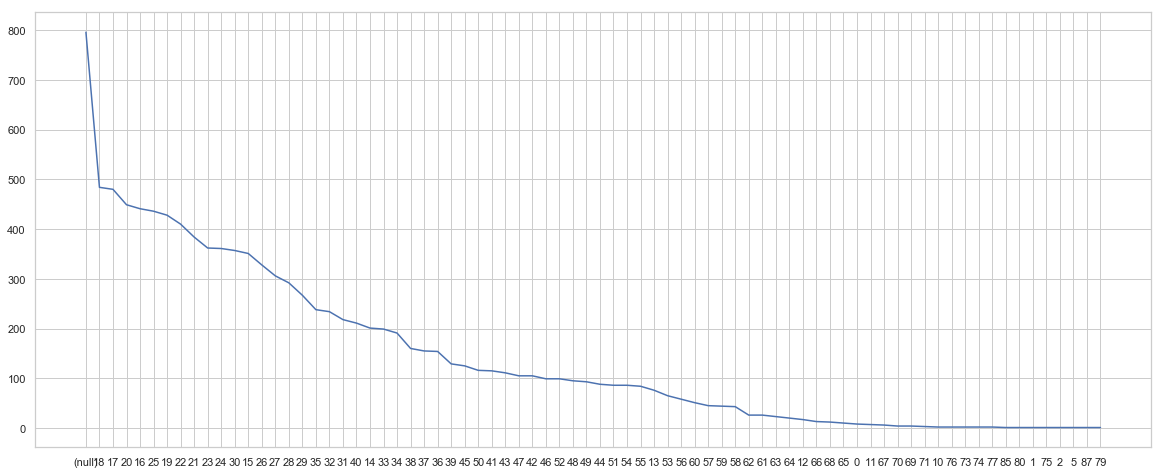

In [144]:
temp = sqf_df['SUSPECT_REPORTED_AGE'].value_counts()
fig, ax = plt.subplots(1,1, figsize = (20, 8))
ax.plot(temp.index, temp.values);